# Notebook to read output of MPSv3r3_rect.py and make plots

In [1]:
import numpy as np
import pkg_resources           
from telescope_baseline.mapping.plot_mapping import plot_targets, plot_n_targets, hist_n_targets, plot_ae_targets, hist_ae_targets, convert_to_convexes, plot_convexes
import matplotlib.pyplot as plt
import h5py

Read the data

In [2]:
fmps = h5py.File("MPSv3r3_rect.h5", "r") 
list(fmps.keys())


['b', 'final_ac', 'hw', 'l', 'nans']

Read original data

In [3]:
import pandas as pd

catdata = pd.read_hdf("/Users/dkawata/work/obs/projs/JASMINE-Mission/telescope_baseline/src/telescope_baseline/data/cat.hdf") 
print(catdata)

               ra        dec  phot_hw_mag
0       266.06440 -31.681997    12.119637
1       266.05920 -31.675295    12.098410
2       266.06006 -31.672873    12.203840
3       266.08743 -31.682108    11.945855
4       266.08150 -31.680900    11.128418
...           ...        ...          ...
146339  265.96005 -27.298906    11.478294
146340  265.95920 -27.297369    11.877740
146341  265.95596 -27.295288     9.249810
146342  265.96014 -27.290794    11.176117
146343  265.95325 -27.293558    10.959004

[146344 rows x 3 columns]


In [4]:
l = fmps.get('l').value
b = fmps.get('b').value
hw = fmps.get('hw').value
nans = fmps.get('nans').value
final_ac = fmps.get('final_ac').value

/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/2207005657.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l = fmps.get('l').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/2207005657.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  b = fmps.get('b').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/2207005657.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  hw = fmps.get('hw').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/2207005657.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nans = fmps.get('nans').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/2207005657.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  final_ac = fmps.get('final_ac').value


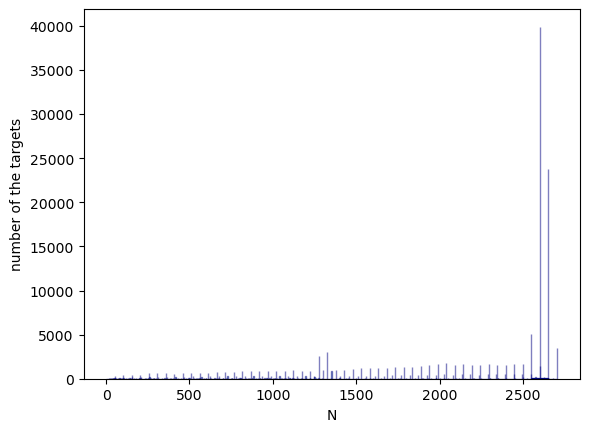

In [5]:
# output number of observations
hist_n_targets(nans)

## Definition of terminology
- plate: image of one exposure
- small frame: an observation field of the size of a focal plane. A small frame is Nplate number of images.
- large frame: The whole Galactic centre field. , a rectoangular region of $0.7<l<-1.4$ deg and $|b|<0.6$ deg.

The large frame is shown below.

### Mapping 

## Galactic Centre observation parameter

- Number of orbits for the whole mission = 6,528 (80 % of available orbits for 3 years)
- Altitude = 600 km -> Orbital period = 5,801 s (from Yamada-san, 05 July 2022)
- Observing time per orbit … 98 % of half orbit = 2,842.49 s. (98% comes from JASMINE_HO_TN_HKZ_202206_02_Brief 21/06/2022 in Slack #Soutenken)
- Number of small frame to observer per orbit = 8.  (number of meneuver = 7).
- Number  of orbits to cover the whole large frame field = 25200  (computed with MPSv3_rec.py)
- Centoroid measurement accuracy per plate (exposure) = 4 mas


### Basic parameters and field of view

In [6]:
# effective Focal length (mm)
EFL_mm=4370.0
# size of each chip
each_width_mm=19.52
# size between each chip
width_mm=22.4
# width of focal plane
fp_width_mm = each_width_mm+width_mm
print(' size of focal plane (mm)= ', fp_width_mm)
# size of field of view degree
fov_deg2 = (fp_width_mm/EFL_mm)*180.0/np.pi
print(' size of FoV (deg)=', fov_deg2)
#  pixel size
pix_um = 10
pix_mas = 3600.0*1000.0*((pix_um/1000.0)/EFL_mm)*180.0/np.pi
print(' pixel scale (mas) = ', pix_mas)

 size of focal plane (mm)=  41.92
 size of FoV (deg)= 0.5496199261300712
 pixel scale (mas) =  472.00184495903056


### JASMINE Galactic centre survey field

In [7]:
# size of JASMINE field
glon_high = 0.7
glon_low = -1.4
glat_high = 0.6
glat_low = -0.6
gcf_deg2 = (glon_high-glon_low)*(glat_high-glat_low) 
print(' size of JASMINE large field (deg^2) =', gcf_deg2)
print(' number of JASMINE FoV to cover large field = ', gcf_deg2/fov_deg2)

 size of JASMINE large field (deg^2) = 2.5199999999999996
 number of JASMINE FoV to cover large field =  4.5849866065511335


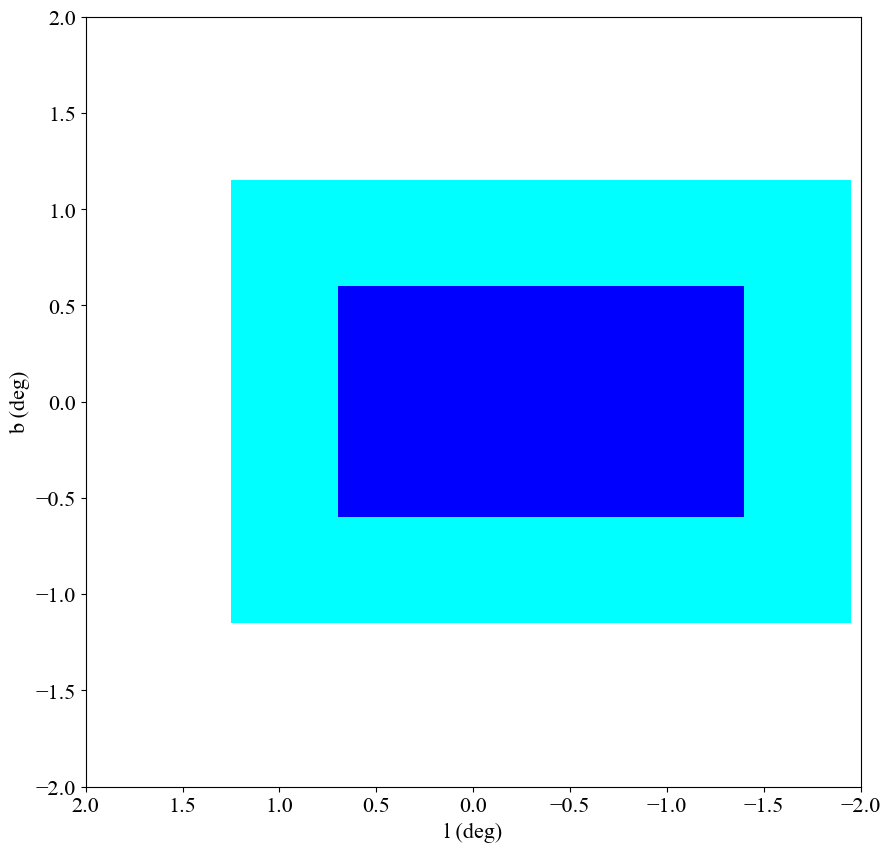

In [8]:
from matplotlib import patches
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(2.0, -2.0)
ax.set_ylim(-2.0, 2.0)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# JASMINE science region
ax.add_patch(patches.Rectangle((glon_low-fov_deg2, glat_low-fov_deg2), glon_high-glon_low+2*fov_deg2, \
                               glat_high-glat_low+2*fov_deg2, lw=5, fc='cyan'))
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='blue'))



### re-consider the orbits

In [9]:
import astropy.units as u
print(' 1 year (s)=', (1.0*u.yr).cgs)
t_orbit = 5801*u.s  # time for orbit
print(' number of orbit for 3 years =', 3.0*((1.0*u.yr).cgs)/t_orbit)
print(' available for GC survey, i.e. 0.5 year =', 0.5*3.0*((1.0*u.yr).cgs)/t_orbit)
print(' 80 % of available for GC survey, i.e. 0.5 year =', 0.8*0.5*3.0*((1.0*u.yr).cgs)/t_orbit)

 1 year (s)= 31557600.0 s
 number of orbit for 3 years = 16320.082744354422
 available for GC survey, i.e. 0.5 year = 8160.041372177211
 80 % of available for GC survey, i.e. 0.5 year = 6528.03309774177


In [10]:
# compute number of possible exposures (plates) per exposure
t_expro = 13.5   # exposure time + read-out time (s)
t_meneuver = 115   # maneuver time (120 s conservative, 115s nominal)
t_obs_orbit = 5801*0.5*0.98  # available observing time for Galactic centre per orbit. 
print(' Tobs per orbit (s) = ', t_obs_orbit )
nsf_orbit = 4  # number of small frame to observe per orbit.
nplate_sf = int((t_obs_orbit-(nsf_orbit-1)*t_meneuver)/t_expro/nsf_orbit)
print(' number of plates per small frame = ',  nplate_sf)
print(' remaining time per orbit = ',  t_obs_orbit-(nplate_sf*nsf_orbit*t_expro+(nsf_orbit-1)*t_meneuver))

 Tobs per orbit (s) =  2842.49
 number of plates per small frame =  46
 remaining time per orbit =  13.489999999999782


- Number of observation per small frame = 18 if nsf_orbit = 8, observation per small frame = 46 if nsf_orbit = 4.
#### Note: if meneuver time is 115 s (nominal), we need to set 18 plates per small frame.

#### for parallax accuracy, we add a parallax factor of 1.15 (JASMINE-CA-TN-YY-019)

In [11]:
#  number of dithering from MPSv3_rect-r3.py
norb_gcf = 45936/nsf_orbit   # Number  of orbits to cover the whole large frame field 
print(' Norbit to cover the whole region with the dithering =', norb_gcf)
norbits = 6528 # number of orbits in the mission. 
ac_plate = 4000  # accuracy per plate (per exposure) (uas) for star with hw_bright (mag)
hw_bright = 12.5  # bright Hw magnitude to have ac_plate 
Nph_star = 10**(hw/-2.5)/10**(hw_bright/-2.5)
# limit brighter stars' accuracy to the same as the accuracy of hw_bright stars
Nph_star[hw<hw_bright] = 1.0
acc_scale = nplate_sf*(norbits/norb_gcf)
parallax_factor = 1.15 # from JASMINE-CA-TN-YY-019
final_ac = parallax_factor*ac_plate/np.sqrt(nans*acc_scale)/np.sqrt(Nph_star)
print(' highest accuracy (uas)=', np.min(final_ac))
print(' number of observation per the full large frame coverage =', norbits/norb_gcf)
ntobs_star = nans*norbits*nplate_sf/norb_gcf   # total number of observation per star
print(' highest number of observation per star=', np.max(ntobs_star))

 Norbit to cover the whole region with the dithering = 11484.0
 highest accuracy (uas)= 17.299441849519532
 number of observation per the full large frame coverage = 0.5684430512016719
 highest number of observation per star= 70705.22048066875


/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_40300/3345828974.py:12: RuntimeWarning: divide by zero encountered in divide
  final_ac = parallax_factor*ac_plate/np.sqrt(nans*acc_scale)/np.sqrt(Nph_star)


In [12]:
print('number of bright stars in the central field =', np.shape(final_ac[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' mean accuracy of the bright stars in the central region', np.mean(final_ac[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' mean accuracy of the faint 14.4-14.5 mag stars in the central region', np.mean(final_ac[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw>14.4) & (hw<14.5)]))
print(' mean number of observation for bright stars in the central region', np.mean(ntobs_star[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' std of accuracy of the bright stars in the central region', np.std(final_ac[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' worst of accuracy of the bright stars in the central region', np.max(final_ac[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' max number of observation for bright stars in the central region', np.max(ntobs_star[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' min number of observation for bright stars in the central region', np.min(ntobs_star[(np.fabs(l)<0.3) & (np.fabs(b)<0.3) & (hw<12.5)]))
print(' min number of observation ', np.min(ntobs_star[ntobs_star>0]))


number of bright stars in the central field = (608,)
 mean accuracy of the bright stars in the central region 17.568649999314413
 mean accuracy of the faint 14.4-14.5 mag stars in the central region 43.20157933989186
 mean number of observation for bright stars in the central region 68563.84875983061
 std of accuracy of the bright stars in the central region 0.11539423863677238
 worst of accuracy of the bright stars in the central region 17.991419523500312
 max number of observation for bright stars in the central region 70705.22048066875
 min number of observation for bright stars in the central region 65370.95088819227
 min number of observation  52.29676071055381


In [13]:
print(' shape final_ac', final_ac)

 shape final_ac [inf inf inf ... inf inf inf]


#### Histogram of total number of observation per mission.

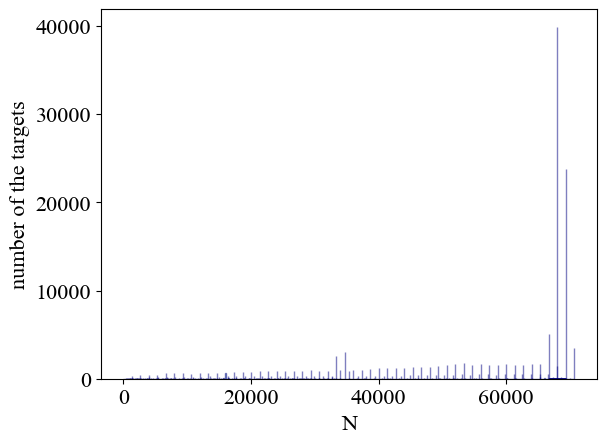

In [14]:
hist_n_targets(ntobs_star)

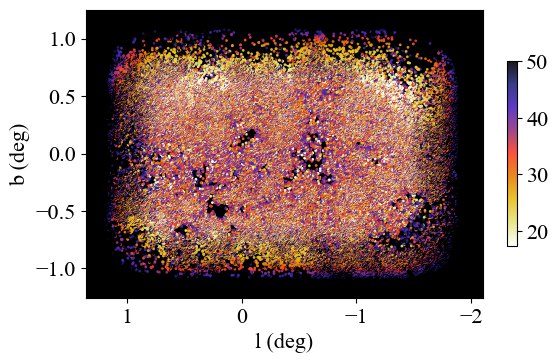

In [15]:
plot_ae_targets(l,b,final_ac,cmap="CMRmap_r")

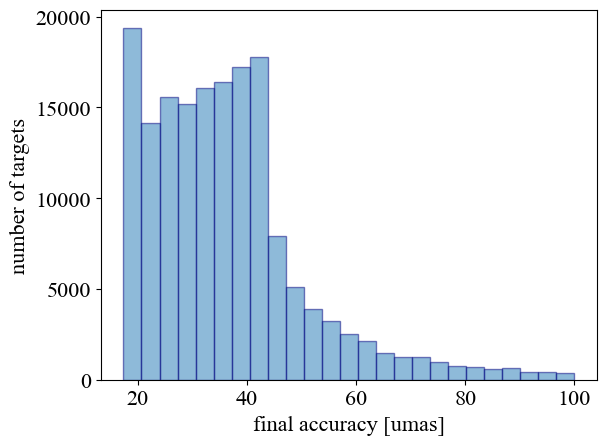

In [16]:
hist_ae_targets(final_ac)

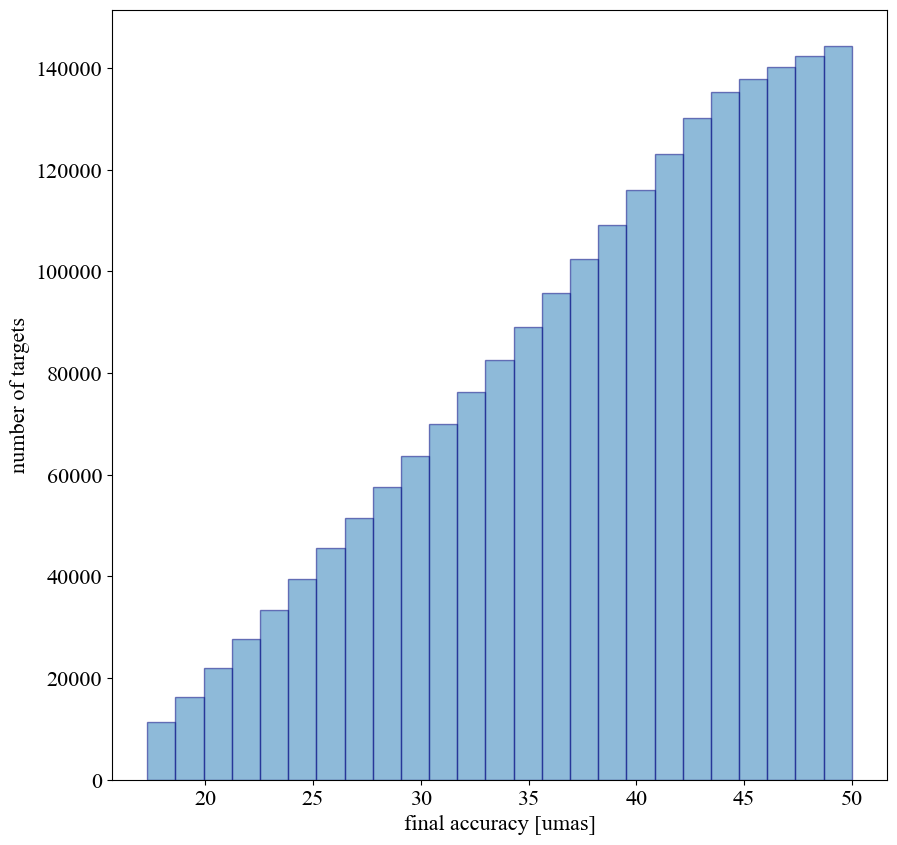

In [17]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
cb=ax.hist(final_ac[final_ac<50.0], alpha=0.5, bins=25, ec='navy', cumulative=True)
ax.set_ylabel("number of targets")
ax.set_xlabel("final accuracy [umas]")
plt.show()


In [18]:
print('number of stars whose astrometric accuracy is better than 17 uas =', np.shape(final_ac[final_ac<17.0]))
print('number of stars whose astrometric accuracy is better than 25 uas =', np.shape(final_ac[final_ac<25.0]))
print('number of stars whose astrometric accuracy is better than 40 uas =', np.shape(final_ac[final_ac<40.0]))
print('number of stars whose astrometric accuracy is better than 37.5 uas =', np.shape(final_ac[final_ac<37.5]))
print('number of stars whose astrometric accuracy is better than 125 uas =', np.shape(final_ac[final_ac<125.0]))
print('highest accuracy =', np.min(final_ac))

number of stars whose astrometric accuracy is better than 17 uas = (0,)
number of stars whose astrometric accuracy is better than 25 uas = (38940,)
number of stars whose astrometric accuracy is better than 40 uas = (111623,)
number of stars whose astrometric accuracy is better than 37.5 uas = (98623,)
number of stars whose astrometric accuracy is better than 125 uas = (167275,)
highest accuracy = 17.299441849519532


### plot the best accuracy data only

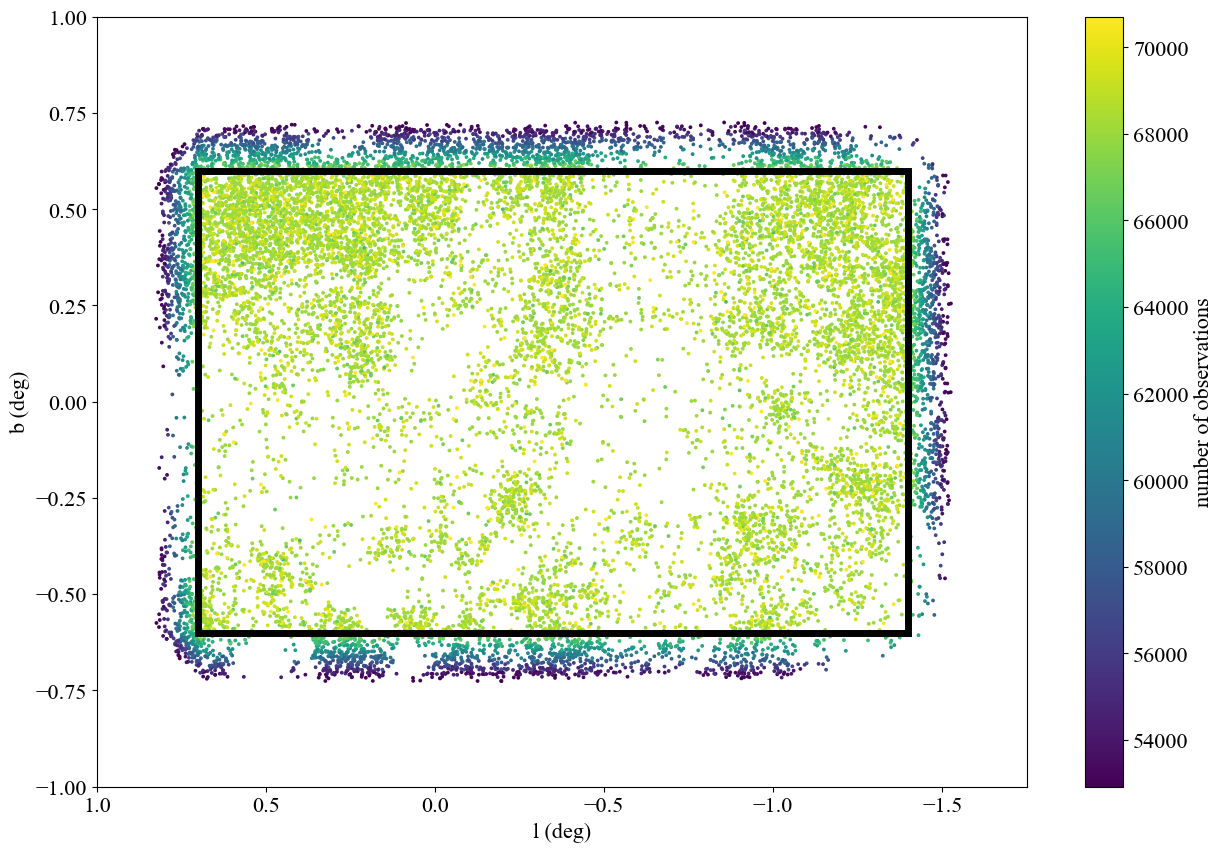

In [19]:
# plot the best accuracy data only
plt.figure(figsize=(15, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.0, -1.75)
ax.set_ylim(-1.0, 1.0)
cb = ax.scatter(l[final_ac<20.0], b[final_ac<20.0], s=3, c=ntobs_star[final_ac<20.0], label='number of observations')
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()

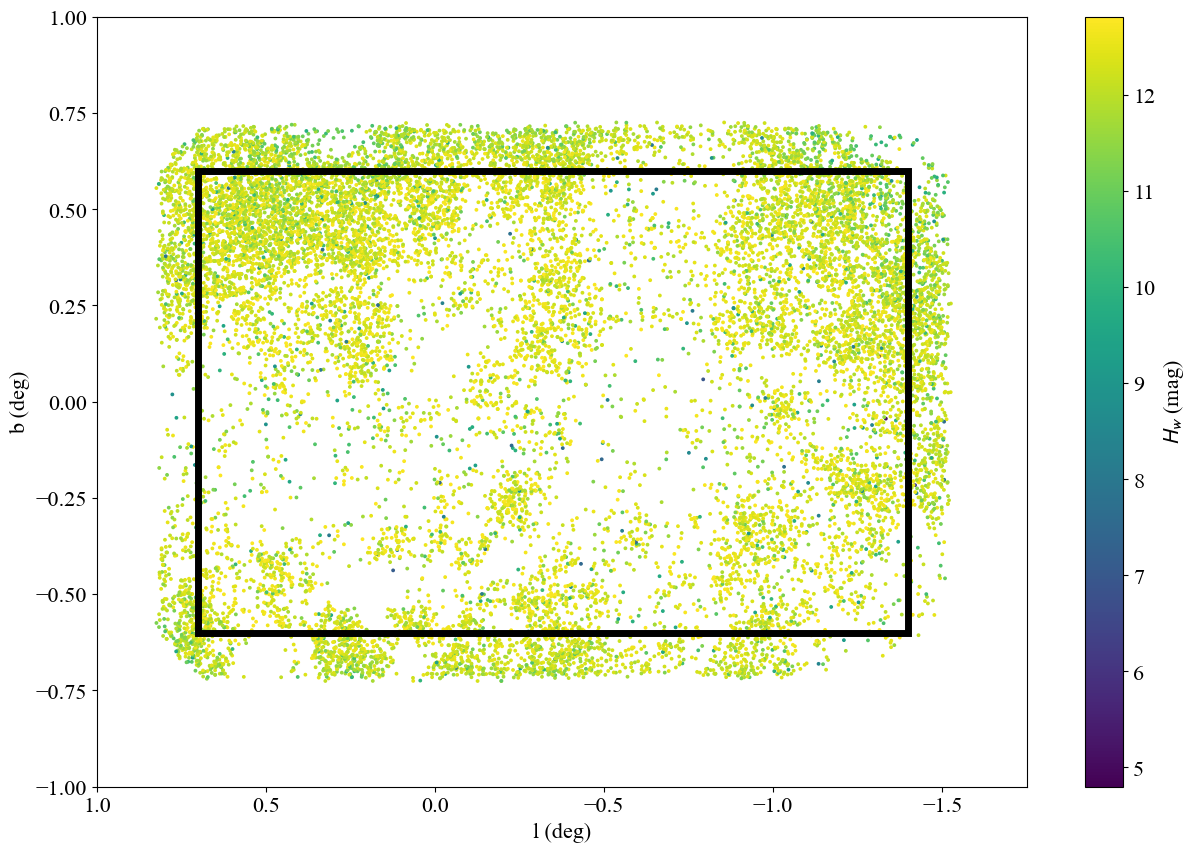

In [20]:
# plot the best accuracy data only
plt.figure(figsize=(15, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.0, -1.75)
ax.set_ylim(-1.0, 1.0)
cb = ax.scatter(l[final_ac<20.0], b[final_ac<20.0], s=3, c=hw[final_ac<20.0], label='number of observations')
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
cbar = plt.colorbar(cb)
cbar.set_label('$H_w$ (mag)')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()

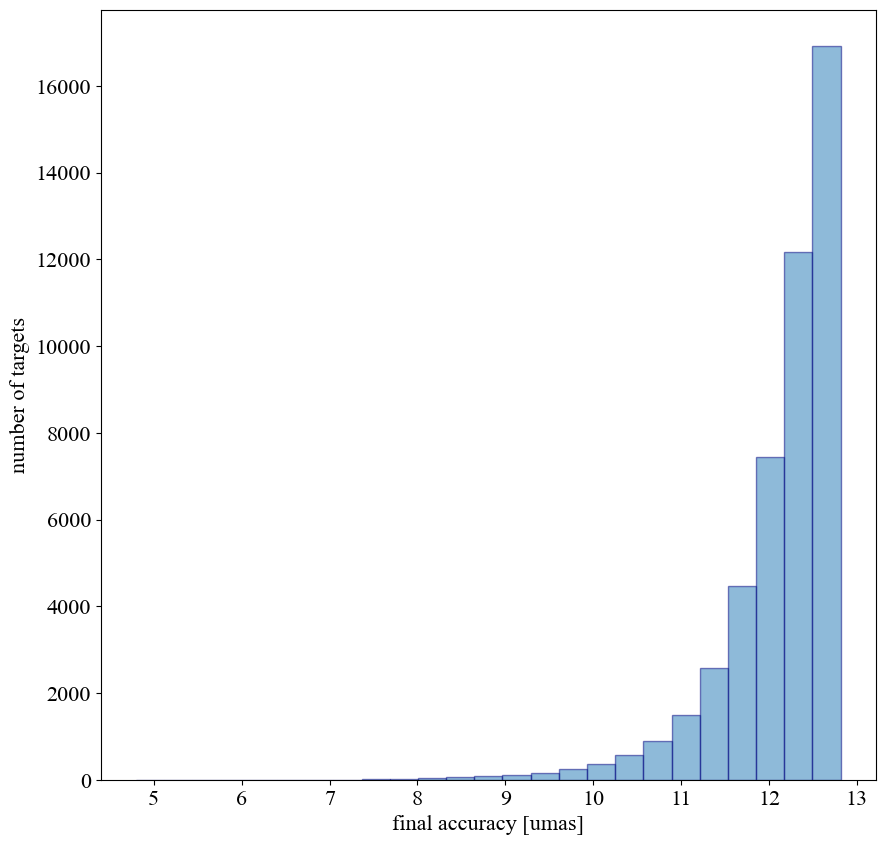

 fantest mag for 20 uas= 12.814796


In [21]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
cb=ax.hist(hw[final_ac<20.0], alpha=0.5, bins=25, ec='navy', cumulative=True)
ax.set_ylabel("number of targets")
ax.set_xlabel("final accuracy [umas]")
plt.show()
print(' fantest mag for 20 uas=', np.max(hw[final_ac<20.0]))

### Only for bright stars (Hw<12.5 mag)

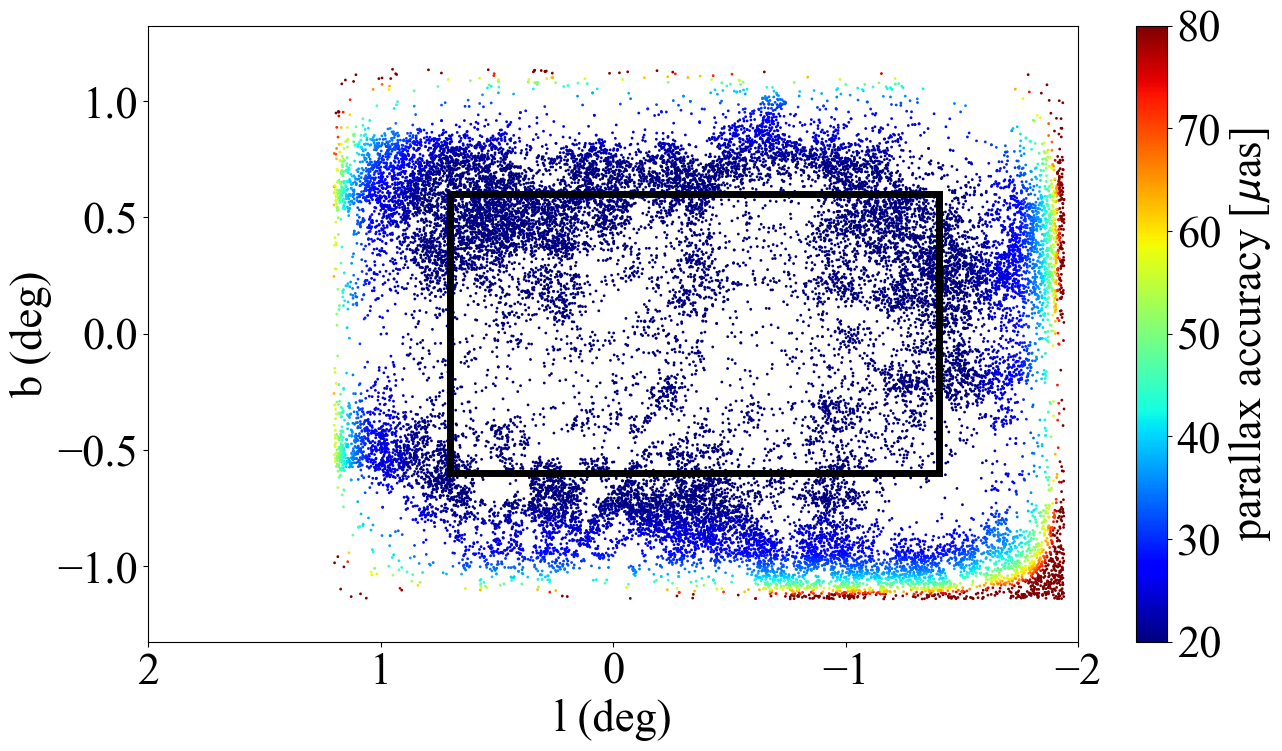

 Total number of stars brighter than  12.5  mag =  25904
  within the JGCS =  7715
 mean accuracy of bright stars within JGCS = 17.577363846500266


In [22]:
# plot the best accuracy data only
from matplotlib.colors import Normalize
hwlim = 12.5
plt.figure(figsize=(15, 8))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 32
ax  = plt.gca()
ax.axis('equal')
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(2.0, -2.0)
ax.set_ylim(-1.5, 1.5)
sindx = np.where((hw<hwlim) & (ntobs_star>0))
cb = ax.scatter(l[sindx],  b[sindx],  s=1,  c=final_ac[sindx],  label='parallax accuracy [$\mu$as]', cmap="jet")
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
cbar = plt.colorbar(cb)
cbar.mappable.set_clim(20, 80)
cbar.set_label('parallax accuracy [$\mu$as]')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()
print(' Total number of stars brighter than ', hwlim, ' mag = ', len(l[sindx]))
print('  within the JGCS = ', len(l[(hw<hwlim) & (l>glon_low) & (l<glon_high) & (b>glat_low) & (b<glat_high)]))
sindx_gcs = np.where((hw<hwlim) & (ntobs_star>0) & (l>glon_low) & (l<glon_high) & (b>glat_low) & (b<glat_high))
print(' mean accuracy of bright stars within JGCS =', np.mean(final_ac[sindx_gcs]))

### stars brighter than 14.5 mag

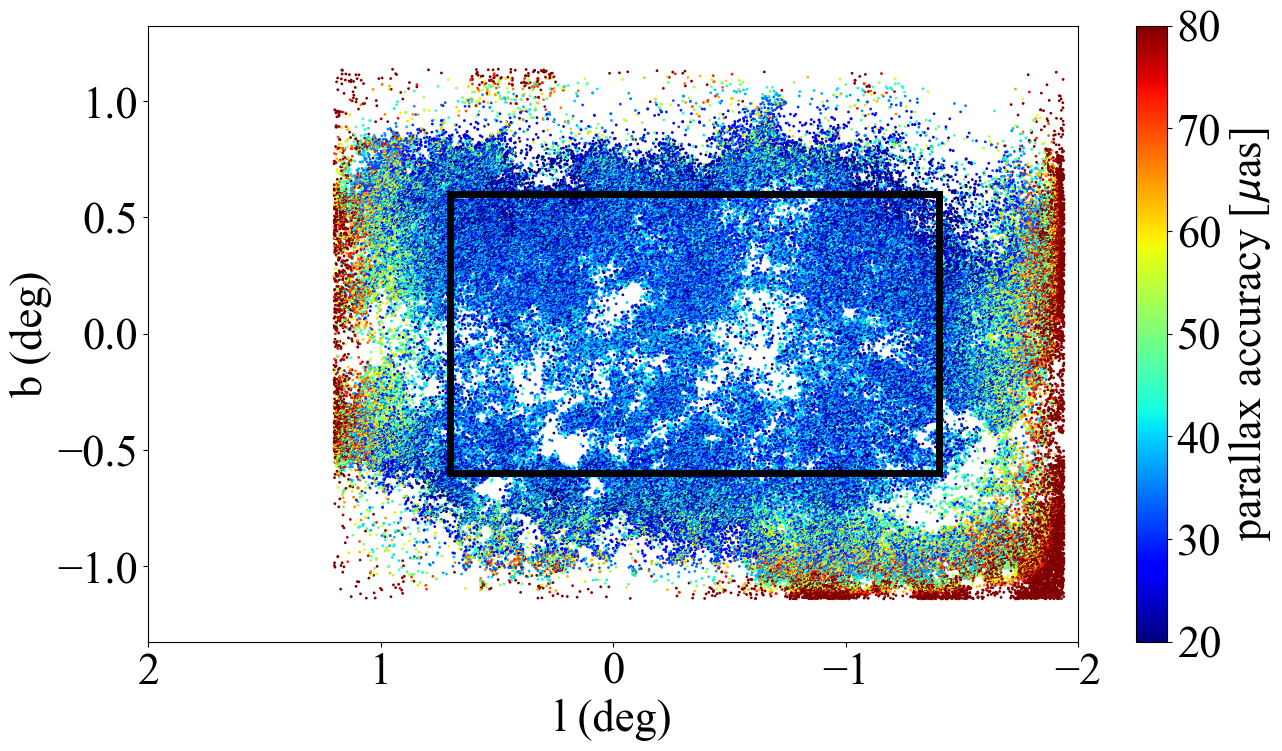

 Total number of stars brighter than  14.5  mag =  170279
  within the JGCS =  76964
 mean accuracy of stars around hlim = 43.16720151994722


In [23]:
# plot the best accuracy data only
from matplotlib.colors import Normalize
hwlim = 14.5
plt.figure(figsize=(15, 8))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 32
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.axis('equal')
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(2.0, -2.0)
ax.set_ylim(-1.5, 1.5)
sindx = np.where((hw<hwlim) & (ntobs_star>0))
cb = ax.scatter(l[sindx],  b[sindx],  s=1,  c=final_ac[sindx],  label='parallax accuracy [$\mu$as]', cmap="jet")
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
cbar = plt.colorbar(cb)
cbar.mappable.set_clim(20, 80)
cbar.set_label('parallax accuracy [$\mu$as]')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()
print(' Total number of stars brighter than ', hwlim, ' mag = ', len(l[sindx]))
print('  within the JGCS = ', len(l[(hw<hwlim) & (l>glon_low) & (l<glon_high) & (b>glat_low) & (b<glat_high)]))
sindx_gcs = np.where((hw<hwlim) & (hw>14.4) & (ntobs_star>0) & (l>glon_low) & (l<glon_high) & (b>glat_low) & (b<glat_high))
print(' mean accuracy of stars around hlim =', np.mean(final_ac[sindx_gcs]))

Only select the data with good astrometry accuracy.

In [24]:
ac_limit = 300
ac_ga = final_ac[final_ac<ac_limit]
hw_ga = hw[final_ac<ac_limit]
nans_ga = nans[final_ac<ac_limit]
l_ga = l[final_ac<ac_limit]
b_ga = b[final_ac<ac_limit]
ntobs_star_ga = ntobs_star[final_ac<ac_limit]
print(' number of tolta observed stars =', np.shape(nans_ga))

 number of tolta observed stars = (169962,)


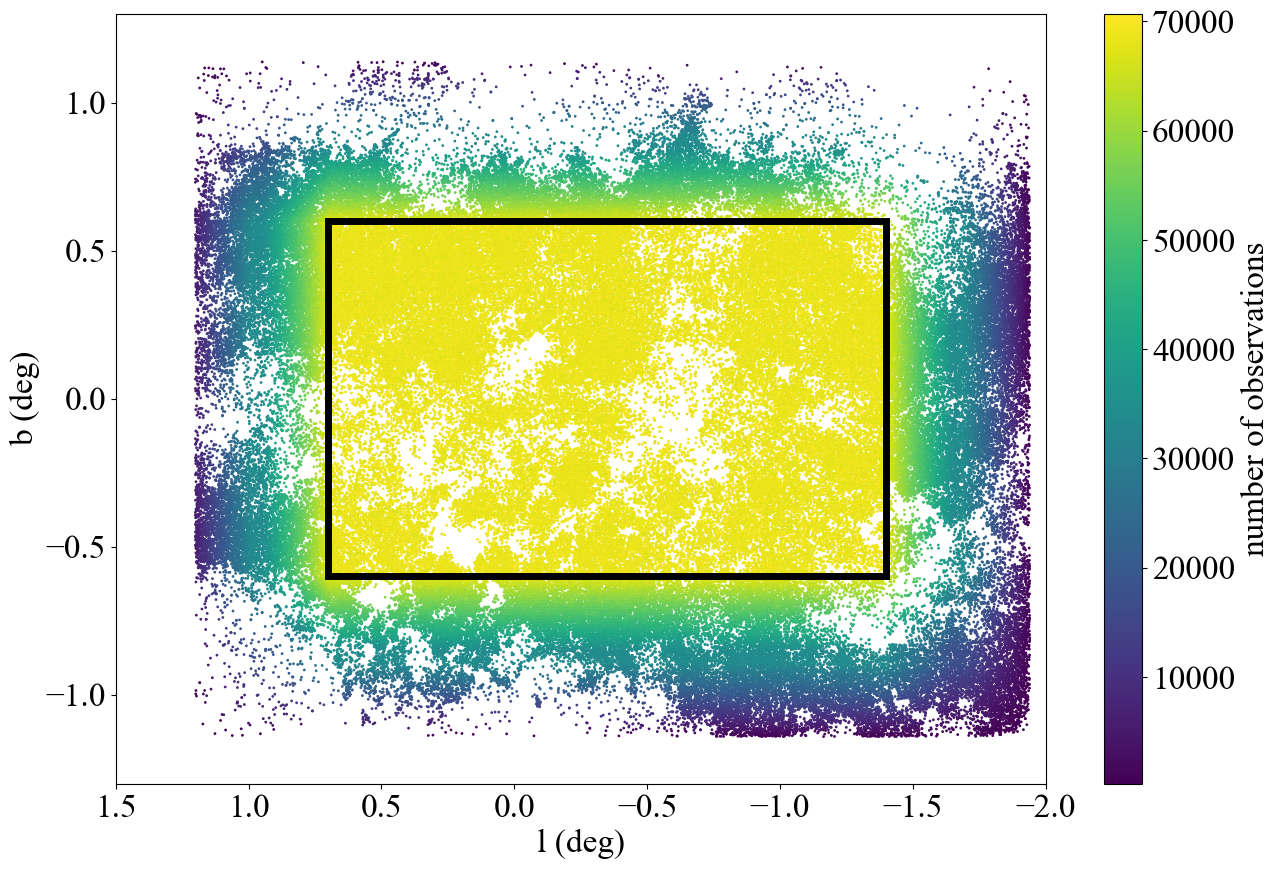

In [27]:
plt.figure(figsize=(15, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 24
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.5, -2.0)
ax.set_ylim(-1.3, 1.3)
cb = ax.scatter(l_ga, b_ga, s=1, c=ntobs_star_ga, label='number of observations')
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
cbar = plt.colorbar(cb,  cmap="CMRmap_r")
cbar.set_label('number of observations')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()

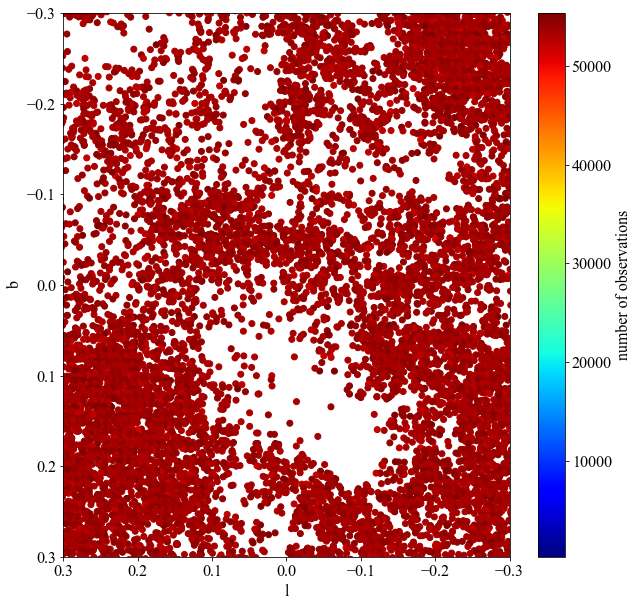

In [31]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(0.3, -0.3)
ax.set_ylim(0.3, -0.3)
cb = ax.scatter(l_ga, b_ga, c=ntobs_star_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("l")
ax.set_ylabel("b")
plt.show()

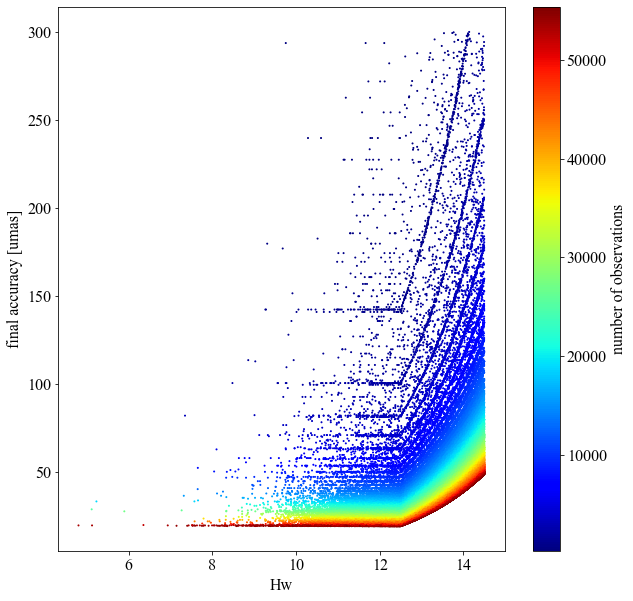

In [32]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
# ax.set_ylim(-1.75, 1.75)
cb = ax.scatter(hw_ga, ac_ga, s=1, c=ntobs_star_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("Hw")
ax.set_ylabel("final accuracy [umas]")
plt.show()

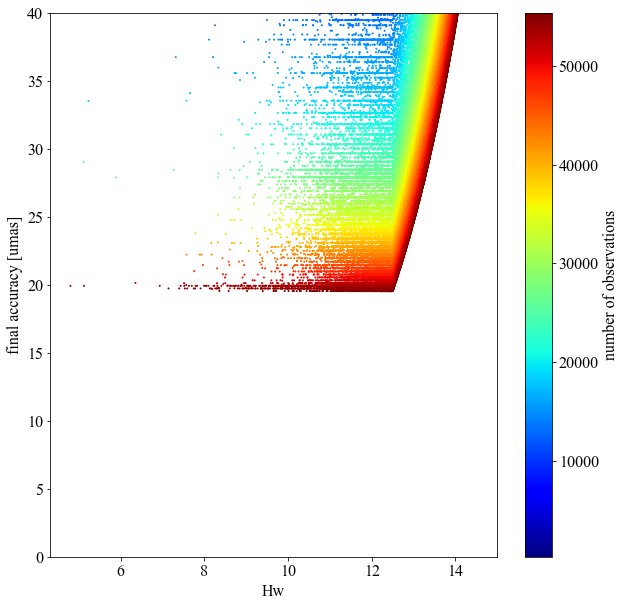

In [33]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
ax.set_ylim(0, 40)
cb = ax.scatter(hw_ga, ac_ga, s=1, c=ntobs_star_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("Hw")
ax.set_ylabel("final accuracy [umas]")
plt.show()

Plot the distribution of stars whose astrometric accuracy is better than 25 $\mu$as. 

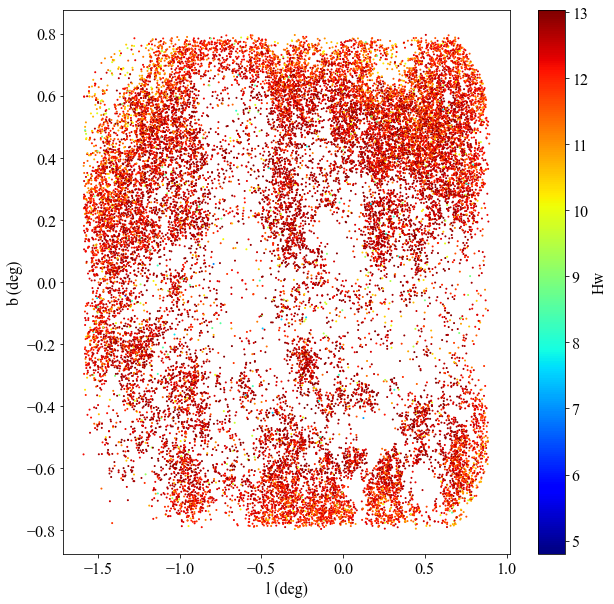

In [34]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
# ax.set_ylim(-1.75, 1.75)
cb = ax.scatter(l_ga[ac_ga<25.0], b_ga[ac_ga<25.0], s=1, c=hw_ga[ac_ga<25.0],  cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('Hw')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()